<a href="https://colab.research.google.com/github/farhanadhilah/Applied_Deep_Learning/blob/main/Projek_UTS/Temp_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/farhanadhilah/Applied_Deep_Learning.git

Cloning into 'Applied_Deep_Learning'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 184 (delta 53), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (184/184), 64.99 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [2]:
%cd /content/Applied_Deep_Learning/Projek_UTS

/content/Applied_Deep_Learning/Projek_UTS


In [3]:
!pip install keras
!pip install tensorflow
!pip install rasterio

     |████████████████████████████████| 462 kB 4.8 MB/s 
     |████████████████████████████████| 19.3 MB 6.1 MB/s 


In [4]:
!python generate_parameters.py

In [26]:
!python TrainingClass.py

In [27]:
!python PostProcessing.py

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [30]:
!python train.py

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
I will train on all these parameter files:

parameters.txt
Warning, folder exists! Delete? (y/n) y
Data loaded succesfully.
/content/Applied_Deep_Learning/Projek_UTS/XNet.py
2022-04-15 14:18:41.917033: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
Model loaded and compiled succesfully.
/content/Applied_Deep_Learning/Projek_UTS/TrainingClass.py:381: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  self.model.fit_generator(self.

#**Demo**

In [31]:
from keras.models import Model, Sequential, load_model
model = load_model("/content/Applied_Deep_Learning/Projek_UTS/Model0/DLs200_64.h5")

In [32]:
import h5py
with h5py.File("/content/Applied_Deep_Learning/Projek_UTS/Model0/DLs200_64.h5", "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [45]:
import cv2
import numpy as np 

testing_image = cv2.imread('/content/Applied_Deep_Learning/Projek_UTS/dataset/image/4401.png')
testing_image = cv2.resize(testing_image, (200,200))
testing_image = cv2.cvtColor(testing_image, cv2.COLOR_BGR2GRAY)
#as we are only running one image, we must reshape to shape (batch, height, width, channels)
testing_image = testing_image.reshape((1,200,200,1))
testing_image = np.asarray(testing_image)

In [46]:
testing_image.shape

(1, 200, 200, 1)

In [47]:
prediction = model.predict(testing_image)

#the prediction is a flattened array and so must be reshaped.
#there are 3 channels as we are actually outputting the probability map over all 3 classes.
prediction = prediction.reshape((200,200,3))

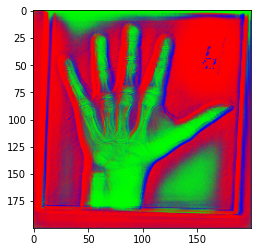

In [48]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#cv2_imshow(prediction.reshape(200,200,3))
plt.imshow(prediction)

In [ ]:
prediction.shape

(1, 40000, 3)